In [9]:
import numpy as np, matplotlib.pyplot as plt
from astropy.io import ascii as asc
from create_ordered_AP_arrays import create_ordered_AP_arrays

FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'

%matplotlib inline

In [21]:
corr_tbl = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl.txt',guess=False,
                Reader=asc.FixedWidthTwoLine)
ha_ii = np.array(corr_tbl['ID'])-1
zspec0 = np.array(corr_tbl['zspec0'])
NAME0 = corr_tbl['NAME0'].data
no_spectra  = np.where((zspec0 <= 0) | (zspec0 > 9))[0]
yes_spectra = np.where((zspec0 >= 0) & (zspec0 < 9))[0]

In [6]:
1.0*len(yes_spectra)/len(corr_tbl)

0.3453703703703704

In [10]:
data_dict = create_ordered_AP_arrays()
HA_FLUX   = data_dict['HA_FLUX'][ha_ii]
HB_FLUX   = data_dict['HB_FLUX'][ha_ii]
HA_SNR    = data_dict['HA_SNR'][ha_ii]
HB_SNR    = data_dict['HB_SNR'][ha_ii]
# getting indices where the valid-redshift (yes_spectra) data has appropriate HB SNR as well as valid HA_FLUX
gooddata_iis = np.where((HB_SNR[yes_spectra] >= 5) & (HA_FLUX[yes_spectra] > 1e-20) & (HA_FLUX[yes_spectra] < 99))[0]
good_EBV_iis = yes_spectra[gooddata_iis]

### done reading input files
### creating ordered AP arr
### done creating ordered AP arr
### creating ordered LMIN0/LMAX0 arrs
### done creating ordered LMIN0/LMAX0 arr
### creating ordered SNR arrs
### done creating ordered SNR arrs
### creating ordered FLUX arrs
### done creating ordered FLUX arrs


In [12]:
1.0*len(gooddata_iis)/len(corr_tbl)

0.15

In [14]:
# zspec0[yes_spectra]

array([ 0.0724,  0.0682,  0.3977,  0.401 ,  0.4003,  0.4001,  0.401 ,
        0.4081,  0.0681,  0.3992,  0.4084,  0.4076,  0.4012,  0.4006,
        0.4014,  0.3998,  0.4081,  0.4012,  0.4006,  0.4   ,  0.3919,
        0.4009,  0.0781,  0.3934,  0.3934,  0.0701,  0.3992,  0.3989,
        0.407 ,  0.408 ,  0.0731,  0.4015,  0.397 ,  0.4126,  0.3918,
        0.3995,  0.3938,  0.4052,  0.4015,  0.4006,  0.4015,  0.4017,
        0.4004,  0.3989,  0.4003,  0.3997,  0.3993,  0.0728,  0.399 ,
        0.0733,  0.4003,  0.399 ,  0.4003,  0.4011,  0.0699,  0.0725,
        0.0735,  0.3998,  0.3989,  0.4008,  0.4007,  0.3999,  0.4001,
        0.401 ,  0.4003,  0.3894,  0.3993,  0.399 ,  0.3997,  0.3999,
        0.0737,  0.4012,  0.3999,  0.3998,  0.4006,  0.4011,  0.4005,
        0.3984,  0.0696,  0.3996,  0.4076,  0.4009,  0.4007,  0.3999,
        0.3928,  0.3988,  0.0764,  0.4043,  0.3999,  0.4003,  0.3999,
        0.4073,  0.4003,  0.3997,  0.399 ,  0.0759,  0.3998,  0.0725,
        0.4019,  0.3

In [13]:
nb704_response = asc.read(FULL_PATH+'Filters/NB704response.dat',guess=False,
                          Reader=asc.NoHeader)
nb711_response = asc.read(FULL_PATH+'Filters/NB711response.dat',guess=False,
                          Reader=asc.NoHeader)
nb816_response = asc.read(FULL_PATH+'Filters/NB816response.dat',guess=False,
                          Reader=asc.NoHeader)
nb921_response = asc.read(FULL_PATH+'Filters/NB921response.dat',guess=False,
                          Reader=asc.NoHeader)
nb973_response = asc.read(FULL_PATH+'Filters/NB973response.dat',guess=False,
                          Reader=asc.NoHeader)

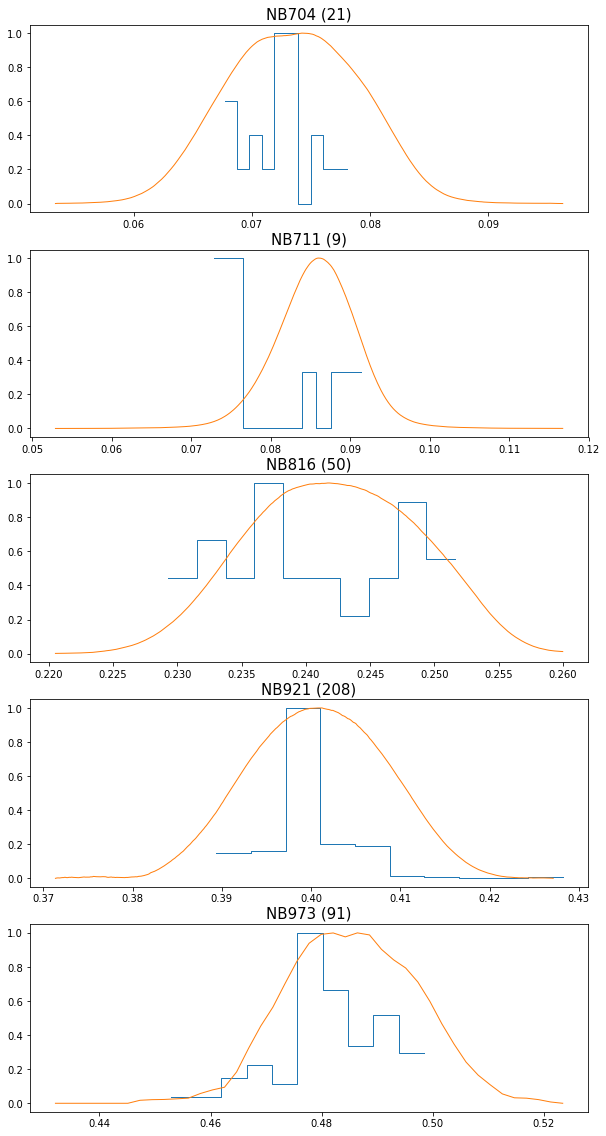

In [68]:
f, axes = plt.subplots(5,1)
filt_arr = np.array(['NB704','NB711','NB816','NB921','NB973'])

for ff, ax, response in zip(filt_arr, axes, 
                            [nb704_response,nb711_response,nb816_response,nb921_response,nb973_response]):
    fmatch = np.array([x for x in range(len(yes_spectra)) if 'Ha-'+ff in NAME0[yes_spectra][x]])
    zspec_distr = zspec0[yes_spectra][fmatch]
#     ax.hist(zspec_distr)
    n, bins, patches = ax.hist(zspec_distr)
    ax.clear()
    n, new_bins = hist_norm_height(n, bins, int(max(n)))
    ax.step(new_bins,n)
    
    ax.plot(response['col1'].data/6562.8 - 1, response['col2'].data/max(response['col2'].data))
    ax.set_title(ff+' ('+str(len(zspec_distr))+')', size=15)
    
f.set_size_inches(10,20)

In [51]:
def hist_norm_height(n,bins,const):
    ''' Function to normalise bin height by a constant. 
        Needs n and bins from np.histogram or ax.hist.'''

    n = np.repeat(n,2)
    n = np.float32(n) / const
    new_bins = [bins[0]]
    new_bins.extend(np.repeat(bins[1:],2))
    return n,new_bins[:-1]